<a href="https://colab.research.google.com/github/sedra-fares/python-HW/blob/main/SEDRA_12325061_Copy_of_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Assignment-3:**
Suppose you have a dataset containing information about students, including their ```gender, parent_education, test_preperation, mark, and scores for a math exam that was repeated three times independently for each student(different questions for each trial) ```.


**example sample**
```
{'gender': 'female',
  'parent_education': 'some college',
  'test_preperation': 'completed',
  'mark': 'D',
  'score_1':60,
  'score_2':40,
  'score_3':70
  }
```

Data is stored in a list of dictionaries, for each dictionary, keys are `gender`, `parent_education`, `test_preperation`, `score_1`, `score_2`, `score_3`, and `mark`.


## Values for each key are as follows :  

**gender :** 'female', 'male'

**parent_education :** "bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school'

**test_preperation :** 'none' 'completed'

**mark :** 'C'  'A'  'B'

**score_1,score_2,score_3 :** Integer values from 0 to 100




In [ ]:
# run this code to generate the data
import pandas as pd
path="https://docs.google.com/spreadsheets/d/1ch0wtMEsdKVBPcceODlPWfi292ECNszzm11MU9xKXAw/export?format=csv&gid=1385521382"
data = pd.read_csv(path).to_dict("records")


In [ ]:
# print the first 5 records
data[0:5]

[{'gender': 'female',
  'parent_education': "master's degree",
  'test_preperation': 'none',
  'score_1': 87,
  'score_2': 93,
  'score_3': 91,
  'mark': 'A'},
 {'gender': 'male',
  'parent_education': 'some college',
  'test_preperation': 'none',
  'score_1': 76,
  'score_2': 78,
  'score_3': 75,
  'mark': 'C'},
 {'gender': 'female',
  'parent_education': "associate's degree",
  'test_preperation': 'none',
  'score_1': 73,
  'score_2': 84,
  'score_3': 79,
  'mark': 'C'},
 {'gender': 'female',
  'parent_education': 'some college',
  'test_preperation': 'completed',
  'score_1': 85,
  'score_2': 93,
  'score_3': 89,
  'mark': 'B'},
 {'gender': 'male',
  'parent_education': 'some college',
  'test_preperation': 'none',
  'score_1': 41,
  'score_2': 43,
  'score_3': 39,
  'mark': 'C'}]

# Question 1 (5 Points)

Suppose a random variable Y represent number of sucesses in the three math exams. (Y is a binomial random variable with n=3) . A student pass an exam when his/her mark is greater or equal to 60

- compute probability of success (p) (2.5 points)
- compute probability of every value of the random variable Y (2.5 points)


In [ ]:
# write your code here to compute probability of success,
# you don't have to write a function
# ----------
# Solution

numberPassingAllExams1 =sum((x['score_1'] >= 60) for x in data)
numberPassingAllExams2 =sum((x['score_2'] >= 60) for x in data)
numberPassingAllExams3 =sum((x['score_3'] >= 60) for x in data)
numberPassingAllExams=(numberPassingAllExams1)+(numberPassingAllExams2)+(numberPassingAllExams3)
totalStudents = len(data)
# the probability of passing all three exams (p)
p = numberPassingAllExams / (totalStudents*3)
print( "Probability of passing all three exams (p):", p)

# ----------


Probability of passing all three exams (p): 0.7364746945898778


**compute probablity of every value of the random variable**

In [ ]:
# write your code here, don't write a function
# you can use the scipy library
import math
p=0.7364746945898778
n=3
prob={}
for k in range(n+1):
  prob[k]=math.comb(n, k) * (p ** k) * ((1 - p) ** (n-k))
  print("Probability of ",k," successes (Y =" ,k,"):", prob[k])
prob2=prob[2]
prob2

Probability of  0  successes (Y = 0 ): 0.018300669415909646
Probability of  1  successes (Y = 1 ): 0.1534347515267656
Probability of  2  successes (Y = 2 ): 0.4288044049291064
Probability of  3  successes (Y = 3 ): 0.39946017412821827


0.4288044049291064

# Question 2 ( 5 Points )

Assume a random variable X that defines the Gender of a student. We define a success when the student is a `female`.

- compute the probability of success using the data (1 point)
- write a function that computes the probability of a bernoulli random **variable**. (2 points)
- plot the distribution of the random variable X (2 points)

**compute probability of success**

In [ ]:
# write code to compute probability of success, no need for a function
# you should get 0.5130890052356021 as a result for p
numberOfFEMALEstudents =sum((x['gender'] =='female')  for x in data)
totalStudents=len(data)

pFemale=numberOfFEMALEstudents/totalStudents
print("Probability of success (p):", pFemale)



Probability of success (p): 0.5130890052356021


**write pmf function**

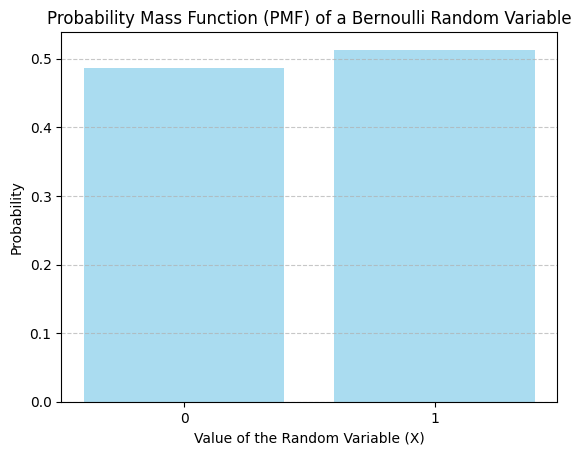

In [ ]:
import matplotlib.pyplot as plt
def pmfBernoulli(p, x):
  if x == 1:
        return p
  elif x == 0:
        return 1 - p
xValues=[0,1]
prob =[ pmfBernoulli(pFemale, x)for x in xValues]

# Plot the PMF
plt.bar(xValues, prob, color='skyblue', alpha=0.7)
plt.xlabel('Value of the Random Variable (X)')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of a Bernoulli Random Variable')
plt.xticks(xValues)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 3 ( 5 Points )

We need to build a function to predict the student mark using information from the columns (Gender, Parent education, Test preperation)

- build a function that receives the entire list of students and a list of columns using which the prediction is going to be conducted.

*input:*
- the historical data as a list of dictionaries
- information of the unseen student as a dictionary
- features (columns) to be used in the mark prediction

*output:*
- the predicted mark for that student. The predicted mark is the mark with the maximum conditional probability.


For example: if we call the function and pass the following arguments:

**predict_mark(data, {'gender': 'female',
  'parent_education': 'some college',
  'test_preperation': 'completed',
  'mark': 'D',
  'score_1':60,
  'score_2':40,
  'score_3':70
  }, ['parent_education'])**

then the function will return the mark with the maximum probability among these
  - p(mark=A|parent_education='some college')
  - p(mark=B|parent_education='some college')
  - p(mark=C|parent_education='some college')

In [ ]:
 # write your prediction function here
def predictMark(data, unseenStudentInfo, features):
    filteredData = []

    # Filter historical data based on selected features
    for student in data:
        selectedFeatures = {feature: student[feature] for feature in features}
        if selectedFeatures == {k: unseenStudentInfo[k] for k in features}:
            filteredData.append(student)

    # Calculate conditional probabilities of each mark given the values of selected features
    conditionalProb = {}
    for mark in ['A', 'B', 'C']:
        countMark = sum(1 for student in filteredData if student['mark'] == mark)
        totalStudents = len(filteredData)
        conditionalProb[mark] = countMark / totalStudents

    # Select the mark with the maximum conditional probability
    predictMark = max(conditionalProb, key=conditionalProb.get)

    return predictMark
unseenStudentInfo = {'gender': 'female', 'parent_education': 'some college', 'test_preperation': 'completed', 'mark': 'D', 'score_1':60, 'score_2':40, 'score_3':70}

# Features to be used in mark prediction
features = ['parent_education']

# Predict the mark for the unseen student
predictMark = predictMark(data, unseenStudentInfo, features)
print("Predicted Mark:", predictMark)

Predicted Mark: C


# Question 4 ( 5 Points )

We need to add a key to each student dictionary called 'predicted_mark' and call the above function to populate this field with data for all students. Now you have two entries `mark` and `predicted_mark`

write code segment to calculate the accuracy of the predictor system you built above.
$$
\text{accuracy} = \frac{\text{number of student dictionaries with identical predicted and actual marks}}{\text{total number of student dictionaries}}
$$

Then calculate the accuracy for this feature combinations:
  - Gender, Parent education, Test preperation



In [ ]:


# Assuming this is your predictMark function
def predictMark(data, unseenStudentInfo, features):
     filteredData = []

    # Filter historical data based on selected features
     for student in data:
        selectedFeatures = {feature: student[feature] for feature in features}
        if selectedFeatures == {k: unseenStudentInfo[k] for k in features}:
            filteredData.append(student)

    # Calculate conditional probabilities of each mark given the values of selected features
     conditionalProb = {}
     for mark in ['A', 'B', 'C']:
        countMark = sum(1 for student in filteredData if student['mark'] == mark)
        totalStudents = len(filteredData)
        conditionalProb[mark] = countMark / totalStudents

    # Select the mark with the maximum conditional probability
     predictMark = max(conditionalProb, key=conditionalProb.get)

     return predictMark

# Iterate over each student in the data
for student in data:
    # Predict the mark for the current student using the specified features
    predicted_mark = predictMark(data, student, ['gender', 'parent_education', 'test_preperation'])

    # Add the 'predicted_mark' key to the student dictionary and assign the predicted mark
    student['predicted_mark'] = predicted_mark

# Calculate the accuracy of the predictor system using the new feature combination
total_students = len(data)
correct_predictions = sum(student['mark'] == student['predicted_mark'] for student in data)
accuracy = correct_predictions / total_students

print("Accuracy with Gender, Parent education, and Test preperation:", accuracy)


Accuracy with Gender, Parent education, and Test preperation: 0.7905759162303665
